In [1]:
import numpy as np
import fitsio
import matplotlib.pyplot as plt
import os
import pandas as pd
import utils
import glob
import tqdm.notebook as tqdm
import matplotlib

In [2]:
files = glob.glob('./data/*/*')
TClasses = ['AGN','BZ','CV','SN','OTHER','NON']

In [ ]:
classes = []
nimages_seq = []
signal_median = []
signal_noise_median = []
pbar = tqdm.tqdm(total=len(files))

for file in files:
    for tclass in TClasses:
        if (tclass in file) == True:
            classes.append(tclass)
            data, h = fitsio.read(file, header=True)
            nimages_seq.append(h['N_IMAGES'])
            hdu_max = max(np.array(fitsio.read(file, ext=1)['HDU_Ext'], dtype=int))
            hdu_min = min(np.array(fitsio.read(file, ext=1)['HDU_Ext'], dtype=int))
            signal_noise = []
            signal = []
            for ext in range(hdu_min,hdu_max+1):
                image = fitsio.read(file, ext=ext)
                signal_noise.append(np.average(image)/np.std(image))
                signal.append(np.average(image))
            signal_noise_median.append(np.median(signal_noise))
            signal_median.append(np.median(signal))
            pbar.update()
pbar.close()

In [ ]:
classes = np.array(classes)
nimages_seq = np.array(nimages_seq)
signal_noise_median = np.array(signal_noise_median)
signal_median = np.array(signal_median)
len(classes), len(nimages_seq), len(signal_noise_median), len(signal_median)

In [ ]:
df = pd.DataFrame(np.array([classes,nimages_seq,signal_noise_median,signal_median]).T, columns=['classes','nimages_seq','signal_noise_median','signal_median'])
df.to_csv('./data/statistics.csv')

In [3]:
df = pd.read_csv('./data/statistics.csv')
classes = df['classes']
nimages_seq = df['nimages_seq']
signal_noise_median = df['signal_noise_median']
signal_median = df['signal_median']

In [15]:
uclasses = np.unique(classes)
for uclass in uclasses:
    print(uclass, sum(np.array(classes)==uclass))

AGN 603
BZ 234
CV 763
NON 14200
OTHER 807
SN 1355


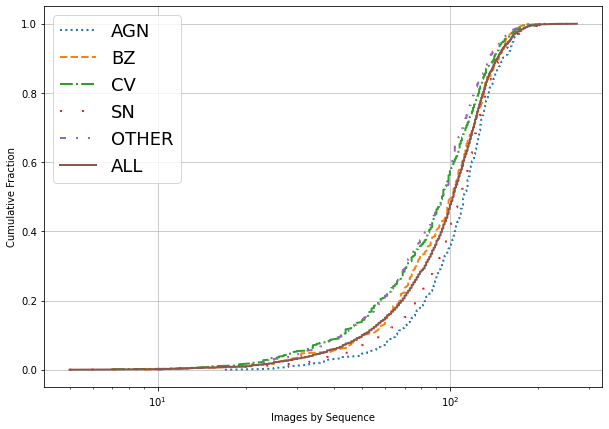

In [4]:
fig = plt.figure(figsize=(10,7))
for tclass, z in zip(['AGN','BZ','CV','SN','OTHER'],[':','--','-.',(0, (1, 10)),(0, (3, 5, 1, 5, 1, 5))]):
    ii = (tclass == classes)
    nimages = np.sort(nimages_seq[ii])
    n_points = len(nimages)
    plt.plot(nimages, np.linspace(0,1,n_points), label=tclass, linestyle=z, linewidth=2)
    
font = {'size' : 18}
matplotlib.rc('font', **font)
    
ii = (classes != 'NON')
nimages = np.sort(nimages_seq[ii])
n_points = len(nimages)
plt.plot(nimages, np.linspace(0,1,n_points), label='ALL', linestyle='-', linewidth=2)
plt.grid(alpha=0.8)
plt.xlabel('Images by Sequence')
plt.ylabel('Cumulative Fraction')
plt.xscale('log')
plt.legend(markerscale=2.)
plt.savefig('./figs/cumulative_NSequence_classes.pdf', bbox_inches='tight')
plt.show()

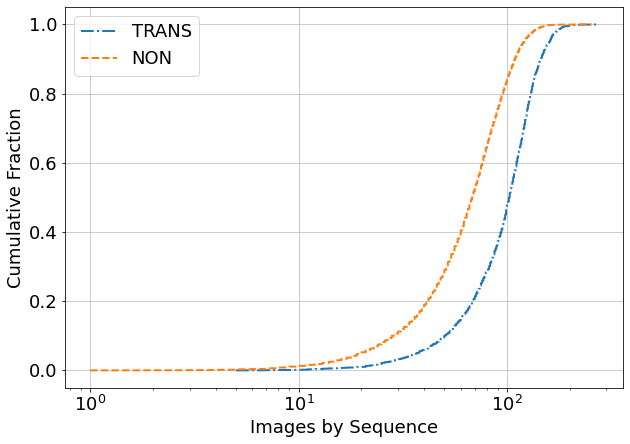

In [5]:
fig = plt.figure(figsize=(10,7))

ii = (classes != 'NON')
nimages = np.sort(nimages_seq[ii])
n_points = len(nimages)
plt.plot(nimages, np.linspace(0,1,n_points), label='TRANS', linestyle='-.', linewidth=2)

ii = (classes == 'NON')
nimages = np.sort(nimages_seq[ii])
n_points = len(nimages)
plt.plot(nimages, np.linspace(0,1,n_points), label='NON', linestyle='--', linewidth=2)

plt.legend(markerscale=2.)
plt.grid(alpha=0.8)
plt.xlabel('Images by Sequence')
plt.ylabel('Cumulative Fraction')
plt.xscale('log')
plt.savefig('./figs/cumulative_NSequence_TvsNT.pdf', bbox_inches='tight')
plt.show()

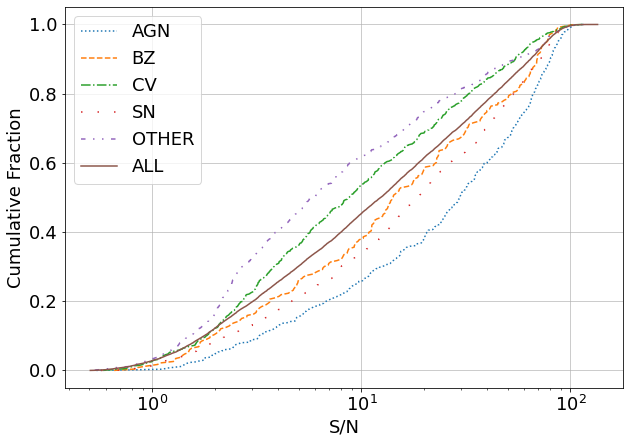

In [6]:
fig = plt.figure(figsize=(10,7))
for tclass, z in zip(['AGN','BZ','CV','SN','OTHER'],[':','--','-.',(0, (1, 10)),(0, (3, 5, 1, 5, 1, 5))]):
    ii = (tclass == classes)
    snm = np.sort(signal_noise_median[ii])
    n_points = len(snm)
    plt.plot(snm, np.linspace(0,1,n_points), label=tclass, linestyle=z)
    
snm_all = np.sort(signal_noise_median)
n_points = len(snm_all)
plt.plot(snm_all, np.linspace(0,1,n_points), label='ALL', linestyle='-')
plt.grid(alpha=0.8)
plt.xlabel('S/N')
plt.xscale('log')
plt.ylabel('Cumulative Fraction')
plt.legend()
plt.savefig('./figs/cumulative_signalnoisse_classes.pdf', bbox_inches='tight')
plt.show()

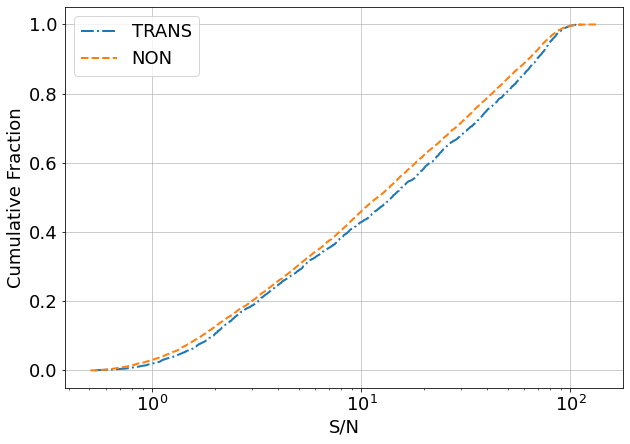

In [7]:
fig = plt.figure(figsize=(10,7))

ii = (classes != 'NON')
snm = np.sort(signal_noise_median[ii])
n_points = len(snm)
plt.plot(snm, np.linspace(0,1,n_points), label='TRANS', linestyle='-.', linewidth=2)

ii = (classes == 'NON')
snm = np.sort(signal_noise_median[ii])
n_points = len(snm)
plt.plot(snm, np.linspace(0,1,n_points), label='NON', linestyle='--', linewidth=2)

plt.legend(markerscale=2.)
plt.grid(alpha=0.8)
plt.xlabel('S/N')
plt.xscale('log')
plt.ylabel('Cumulative Fraction')
plt.savefig('./figs/cumulative_signalnoisse_TvsNT.pdf', bbox_inches='tight')
plt.show()

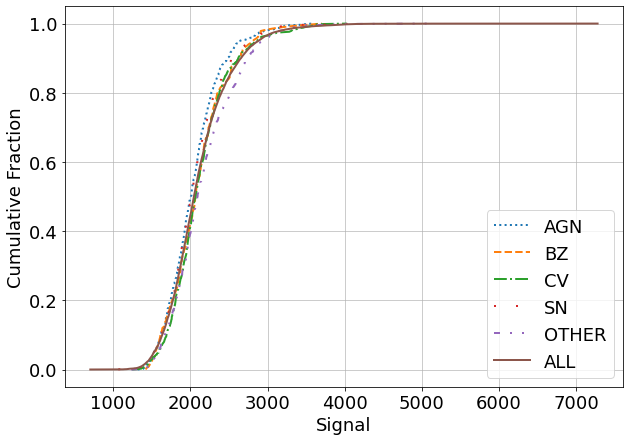

In [8]:
fig = plt.figure(figsize=(10,7))
for tclass, z in zip(['AGN','BZ','CV','SN','OTHER'],[':','--','-.',(0, (1, 10)),(0, (3, 5, 1, 5, 1, 5))]):
    ii = (tclass == classes)
    snm = np.sort(signal_median[ii])
    n_points = len(snm)
    plt.plot(snm, np.linspace(0,1,n_points), label=tclass, linestyle=z, linewidth=2)
    
snm_all = np.sort(signal_median)
n_points = len(snm_all)
plt.plot(snm_all, np.linspace(0,1,n_points), label='ALL', linestyle='-', linewidth=2)
plt.grid(alpha=0.8)
plt.xlabel('Signal')
plt.ylabel('Cumulative Fraction')
plt.legend(markerscale=2.)
plt.savefig('./figs/cumulative_signal_classes.pdf', bbox_inches='tight')
plt.show()

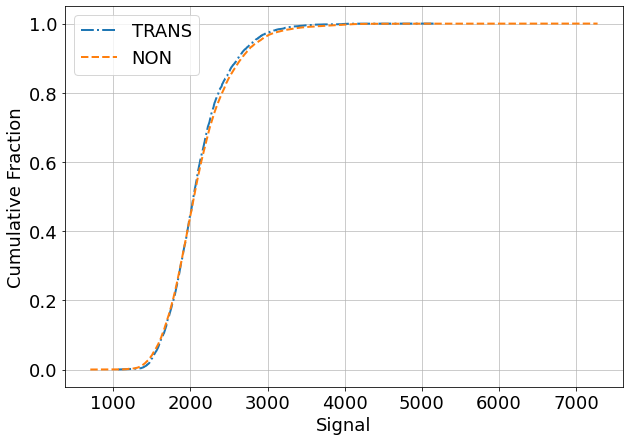

In [9]:
fig = plt.figure(figsize=(10,7))

ii = (classes != 'NON')
snm = np.sort(signal_median[ii])
n_points = len(snm)
plt.plot(snm, np.linspace(0,1,n_points), label='TRANS', linestyle='-.', linewidth=2)

ii = (classes == 'NON')
snm = np.sort(signal_median[ii])
n_points = len(snm)
plt.plot(snm, np.linspace(0,1,n_points), label='NON', linestyle='--', linewidth=2)

plt.legend(markerscale=2.)
plt.grid(alpha=0.8)
plt.xlabel('Signal')
plt.ylabel('Cumulative Fraction')
plt.savefig('./figs/cumulative_signal_TvsNT.pdf', bbox_inches='tight')
plt.show()

In [ ]:
TClasses = ['AGN','BZ','CV','SN','OTHER','NON']
N = 50

files2plot = []
nimages_seq = []
pbar = tqdm.tqdm(total=len(TClasses))
for tclass in TClasses:
    files = glob.glob('./data/{}/*'.format(tclass))
    files = np.random.choice(files, 100)
    seq = False
    for file in files:
        if seq == False:
            data, h = fitsio.read(file, header=True)
            nimages_seq.append(h['N_IMAGES'])
            if h['N_IMAGES'] >= N:
                files2plot.append(file)
#                 print(file)
                seq = True
    pbar.update()
pbar.close()

i = 1
fig = plt.figure(figsize=(15,9))
for file2plot in files2plot:
    Ny = 10
    exts = np.random.choice(N, Ny, replace= False)+2
    data = fitsio.read(file2plot)
    MJDs = np.array(data['MJD'])[exts-2]
    iimjd = np.argsort(MJDs)
    exts = exts[iimjd]    
    for ext in exts:
        plt.subplot(6,Ny,i)
        data = fitsio.read(file2plot, ext=ext)
        zmin, zmax = utils.zscale(data)
        plt.imshow(data, vmin=zmin, vmax=zmax)
        plt.axis('off')
        i += 1

plt.savefig('./figs/objects_matrix.pdf', bbox_inches='tight')
plt.show()

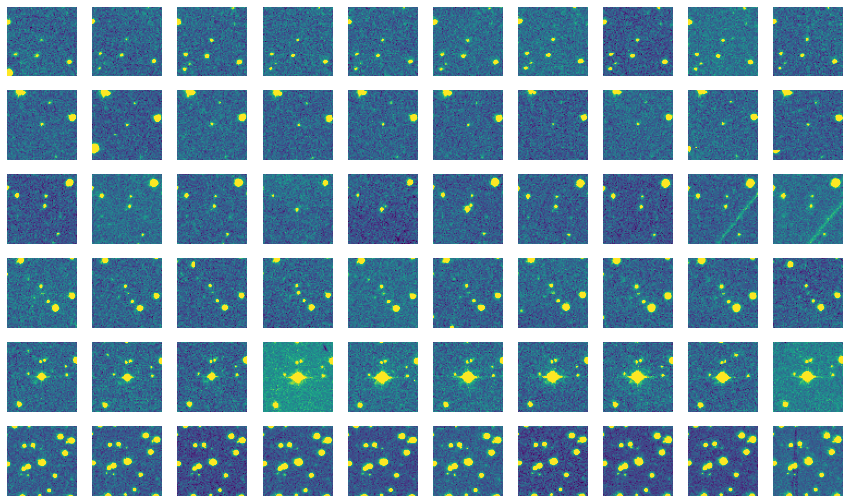

In [11]:
files2plot = ['./data/AGN/CSS130627:001809+274920.fits',
'./data/BZ/CSS110427:133245+472224.fits',
'./data/CV/CSS090102:230342+171755.fits',
'./data/SN/CSS100706:141532-094356.fits',    
'./data/OTHER/CSS100911:234203-043105.fits',
'./data/NON/nonCSS:242.613-0.674915.fits']

i = 1
N = 50
fig = plt.figure(figsize=(15,9))
for file2plot in files2plot:
    Ny = 10
    exts = np.random.choice(N, Ny, replace= False)+2
    data = fitsio.read(file2plot)
    MJDs = np.array(data['MJD'])[exts-2]
    iimjd = np.argsort(MJDs)
    exts = exts[iimjd]
    for ext in exts:
        plt.subplot(6,Ny,i)
        data = fitsio.read(file2plot, ext=ext)
        zmin, zmax = utils.zscale(data)
        plt.imshow(data, vmin=zmin, vmax=zmax)
        plt.axis('off')
        i += 1

plt.savefig('./figs/objects_matrix.pdf', bbox_inches='tight')
plt.show()